In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
from Blackbox import load_model
model = load_model()
model

[06-09 14:02:15][INFO] c:\Users\PC\Documents\Github1.0\BlackboxS\Blackbox\blackbox.py
[06-09 14:02:15][INFO] 2025-06-09 14:02:15.848944
Current working directory: c:\Users\PC\Documents\Github1.0\BlackboxS


<Sequential name=sequential_14, built=True>

In [3]:
%autoreload 2
from Blackbox import predict_point, predict_batch
predict_point(model, 0.2, 0.4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


np.float32(1.0)

In [4]:
predict_point(model, 1.1, 1.3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


np.float32(0.0)

In [5]:
%autoreload 2
from Blackbox import predict_point, predict_batch
predict_batch(model, [0.2, 1.1], [0.4, 1.3])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


[1.0, 0.0]

In [6]:
model = load_model()

def validate_model():
    test_cases = [
        (0.2, 0.4, 1.0),
        (1.1, 1.3, 0.0),
        (0.5, 0.6, 0.0),
        (0.9, 1.01, 1.0),
        (0.0, 0.11, 1.0),
        (0.99, 1.10, 1.0),
        (1.0, 1.11, 0.0)
    ]
    
    for x1, x2, expected in test_cases:
        result = predict_point(model, x1, x2)
        print(f"({x1}, {x2}) → {result} (Esperado: {expected}) {'✅' if result == expected else '❌'}")

Current working directory: c:\Users\PC\Documents\Github1.0\BlackboxS


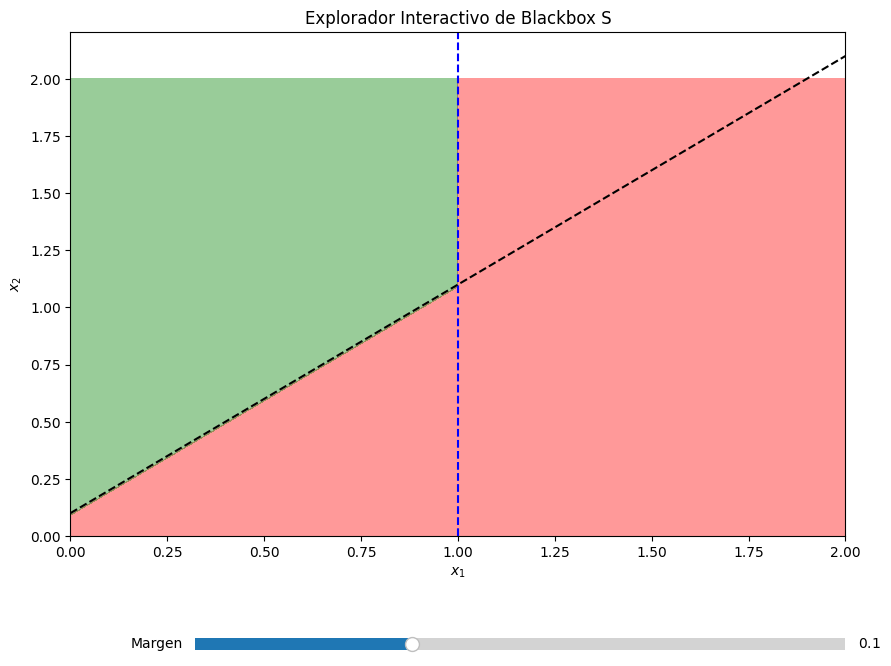

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

fig, ax = plt.subplots(figsize=(10, 8))
plt.subplots_adjust(bottom=0.25)

x1 = np.linspace(0, 2, 100)
x2 = np.linspace(0, 2, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = np.array([[1.0 if (i < 1.0 and j > i + 0.1) else 0.0 for i in x1] for j in x2])

contour = ax.contourf(X1, X2, Z, levels=[-0.5, 0.5, 1.5], colors=['red', 'green'], alpha=0.4)
ax.axvline(x=1.0, color='blue', linestyle='--')
ax.plot(x1, x1 + 0.1, 'k--')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Explorador Interactivo de Blackbox S')

# Añadir controles deslizantes
axcolor = 'lightgoldenrodyellow'
ax_margin = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
margin_slider = Slider(ax_margin, 'Margen', 0.0, 0.3, valinit=0.1)

def update(val):
    margin = margin_slider.val
    Z = np.array([[1.0 if (i < 1.0 and j > i + margin) else 0.0 for i in x1] for j in x2])
    for c in contour.collections:
        c.remove()
    contour = ax.contourf(X1, X2, Z, levels=[-0.5, 0.5, 1.5], colors=['red', 'green'], alpha=0.4)
    ax.lines[1].set_ydata(x1 + margin)
    fig.canvas.draw_idle()

margin_slider.on_changed(update)

plt.show()

In [ ]:
import tkinter as tk
from tkinter import messagebox
import matplotlib.pyplot as plt
from Blackbox import load_model, predict_point

model = load_model()

def validar_float(valor):
    try:
        float(valor)
        return True
    except ValueError:
        return False

def predecir():
    x1 = entrada_x1.get()
    x2 = entrada_x2.get()
    
    if not (validar_float(x1) and validar_float(x2)):
        messagebox.showerror("Error", "Por favor, ingrese valores numéricos válidos.")
        return
    
    x1 = float(x1)
    x2 = float(x2)
    
    resultado = predict_point(model, x1, x2)
    etiqueta_resultado.config(text=f"Resultado: {resultado}")
    graficar_punto(x1, x2, resultado)

def graficar_punto(x1, x2, resultado):
    plt.figure(figsize=(6, 6))
    color = "green" if resultado == 1.0 else "red"
    plt.scatter(x1, x2, color=color, s=100, label=f"({x1}, {x2}) = {resultado}")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title("Predicción de la Red Neuronal")
    plt.grid(True)
    plt.legend()
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.axhline(0, color='gray', linestyle='--')
    plt.axvline(0, color='gray', linestyle='--')
    plt.show()

# Interfaz
ventana = tk.Tk()
ventana.title("Interfaz de la Red Neuronal Blackbox S")

tk.Label(ventana, text="x1:").grid(row=0, column=0, padx=5, pady=5)
entrada_x1 = tk.Entry(ventana)
entrada_x1.grid(row=0, column=1, padx=5, pady=5)

tk.Label(ventana, text="x2:").grid(row=1, column=0, padx=5, pady=5)
entrada_x2 = tk.Entry(ventana)
entrada_x2.grid(row=1, column=1, padx=5, pady=5)

boton_predecir = tk.Button(ventana, text="Predecir", command=predecir)
boton_predecir.grid(row=2, column=0, columnspan=2, pady=10)

etiqueta_resultado = tk.Label(ventana, text="Resultado: ")
etiqueta_resultado.grid(row=3, column=0, columnspan=2, pady=10)

ventana.mainloop()

Current working directory: c:\Users\PC\Documents\Github1.0\BlackboxS


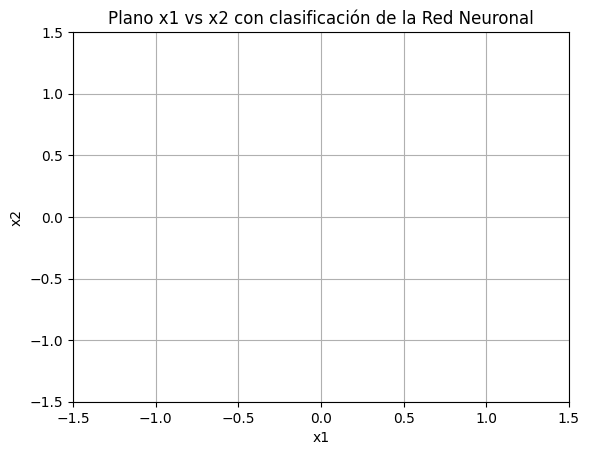

In [8]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Lista para guardar los puntos (x1, x2, clase)
puntos = []

# Función para predecir, guardar y graficar
def predecir_y_graficar(x1, x2):
    clase = predict_point(model, x1, x2)
    puntos.append((x1, x2, clase))
    dibujar_grafica()
    print(f"Entrada: x1 = {x1}, x2 = {x2} → Clase predicha: {clase}")

# Función para redibujar todos los puntos en la gráfica
def dibujar_grafica():
    clear_output(wait=True)  # Limpia la celda anterior
    fig, ax = plt.subplots()
    ax.set_title("Plano x1 vs x2 con clasificación de la Red Neuronal")
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.grid(True)

    # Graficar cada punto según su clase
    for x1, x2, clase in puntos:
        color = 'blue' if clase == 1.0 else 'red'
        ax.plot(x1, x2, 'o', color=color)

    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    plt.show()

# Widgets de entrada
x1_input = widgets.FloatText(description='x1:', value=0.0)
x2_input = widgets.FloatText(description='x2:', value=0.0)
boton = widgets.Button(description="Evaluar")

# Función para manejar el clic
def on_click(b):
    try:
        predecir_y_graficar(x1_input.value, x2_input.value)
    except Exception as e:
        print(f"Error: {e}")

boton.on_click(on_click)

# Mostrar la interfaz
display(x1_input, x2_input, boton)
dibujar_grafica()

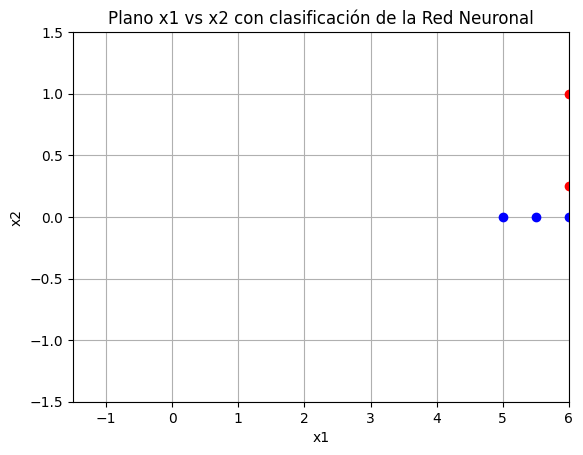

FloatText(value=6.0, description='x1:')

FloatText(value=0.25, description='x2:')

Button(description='Evaluar', style=ButtonStyle())

In [ ]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Lista para guardar los puntos (x1, x2, clase)
puntos = []

# Función para predecir, guardar y graficar
def predecir_y_graficar(x1, x2):
    clase = predict_point(model, x1, x2)
    puntos.append((x1, x2, clase))
    dibujar_grafica()
    print(f"Entrada: x1 = {x1}, x2 = {x2} → Clase predicha: {clase}")

# Función para redibujar todos los puntos en la gráfica
def dibujar_grafica():
    clear_output(wait=True)  # Limpia la celda anterior
    fig, ax = plt.subplots()
    ax.set_title("Plano x1 vs x2 con clasificación de la Red Neuronal")
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.grid(True)

    # Graficar cada punto según su clase
    for x1, x2, clase in puntos:
        color = 'blue' if clase == 1.0 else 'red'
        ax.plot(x1, x2, 'o', color=color)

    ax.set_xlim(-1.5, 6)
    ax.set_ylim(-1.5, 1.5)
    plt.show()

    # Volver a mostrar widgets después del clear_output
    display(x1_input, x2_input, boton)

# Widgets de entrada
x1_input = widgets.FloatText(description='x1:', value=0.0)
x2_input = widgets.FloatText(description='x2:', value=0.0)
boton = widgets.Button(description="Evaluar")

# Función para manejar el clic
def on_click(b):
    try:
        predecir_y_graficar(x1_input.value, x2_input.value)
    except Exception as e:
        print(f"Error: {e}")

boton.on_click(on_click)

# Mostrar la interfaz inicial
display(x1_input, x2_input, boton)
dibujar_grafica()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━

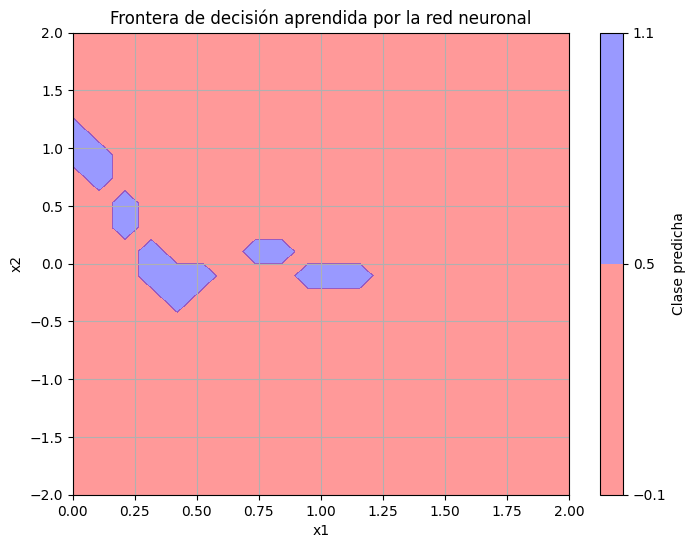

In [10]:
# Crear una malla de puntos en el plano x1, x2
x1_vals = np.linspace(0, 2, 20)
x2_vals = np.linspace(-2, 2, 20)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# Evaluar el modelo en cada punto de la malla
Z = np.array([
    [predict_point(model, x1, x2) for x1 in x1_vals]
    for x2 in x2_vals
])

# Visualizar la frontera de decisión
plt.figure(figsize=(8, 6))
plt.contourf(X1, X2, Z, levels=[-0.1, 0.5, 1.1], colors=['red', 'blue'], alpha=0.4)
plt.colorbar(label="Clase predicha")
plt.title("Frontera de decisión aprendida por la red neuronal")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()

In [12]:
import pandas as pd

# Rango y resolución de puntos a evaluar
x1_vals = np.linspace(0, 2, 10)
x2_vals = np.linspace(-2, 2, 10)

# Evaluar el modelo en todos los puntos combinados
data = []

for x1 in x1_vals:
    for x2 in x2_vals:
        y = predict_point(model, x1, x2)
        data.append([x1, x2, y])

# Convertir a array y DataFrame para fácil análisis
array_resultados = np.array(data)
df_resultados = pd.DataFrame(array_resultados, columns=["x1", "x2", "y_pred"])

# Mostrar las primeras filas
print(df_resultados.head(10))

# (Opcional) Exportar a CSV para análisis externo
# df_resultados.to_csv("resultados_modelo.csv", index=False, sep="|")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

In [13]:
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_100 (Dense)               │ (None, 23)             │            69 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_101 (Dense)               │ (None, 23)             │           552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_102 (Dense)               │ (None, 21)             │           504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_103 (Dense)               │ (None, 19)             │           418 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_104 (Dense)               │ (None, 12)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_105 (Dense)               │ (None, 6)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_106 (Dense)               │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ (None, 5)              │            35 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_108 (Dense)               │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,834 (22.79 KB)

 Trainable params: 1,944 (7.59 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,890 (15.20 KB)

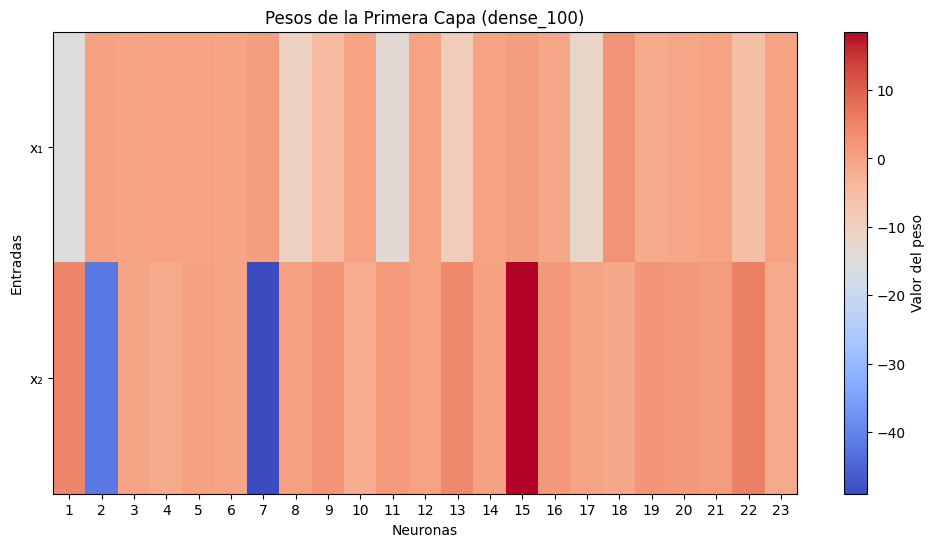

In [14]:
# Asumiendo que 'model' es tu modelo cargado
weights, biases = model.layers[0].get_weights()

plt.figure(figsize=(12, 6))
plt.imshow(weights, cmap='coolwarm', aspect='auto')
plt.colorbar(label='Valor del peso')
plt.xticks(range(23), range(1, 24))
plt.yticks([0, 1], ['x₁', 'x₂'])
plt.title('Pesos de la Primera Capa (dense_100)')
plt.xlabel('Neuronas')
plt.ylabel('Entradas')
plt.show()

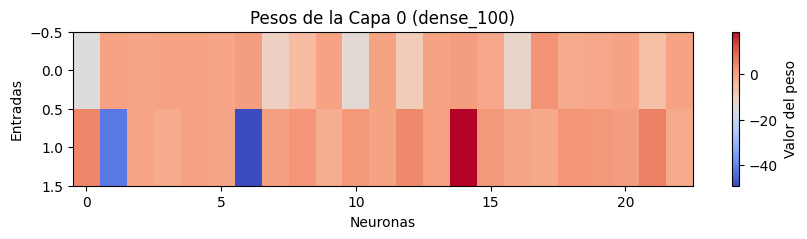

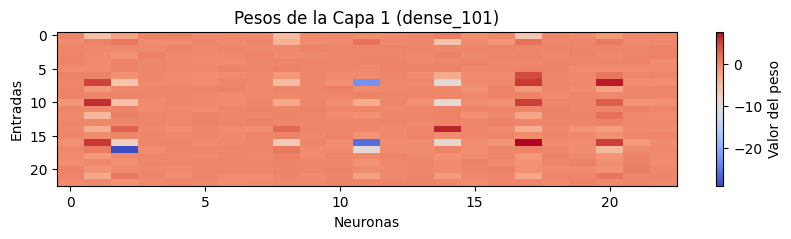

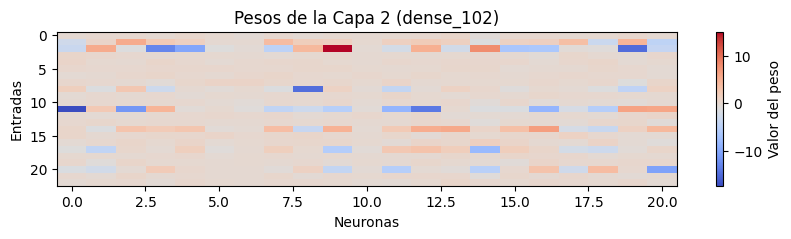

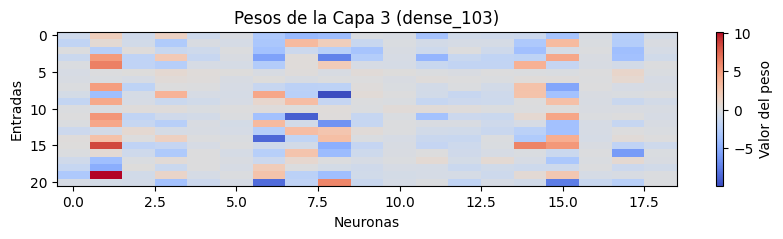

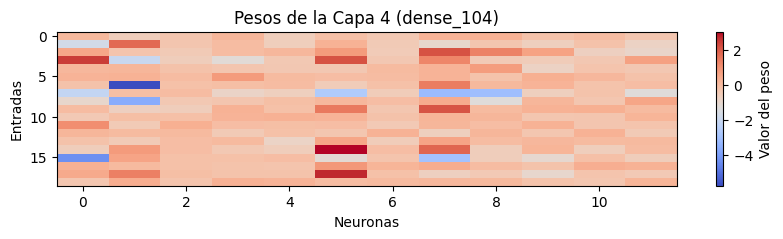

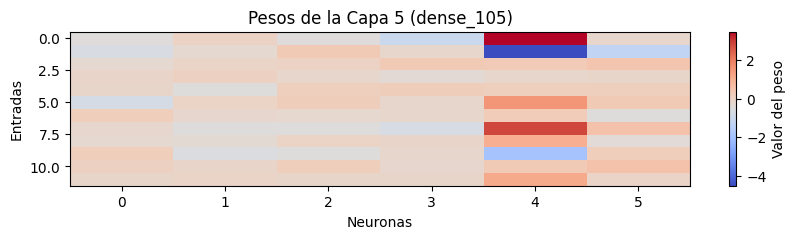

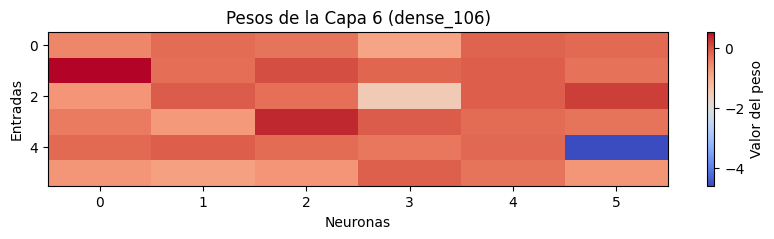

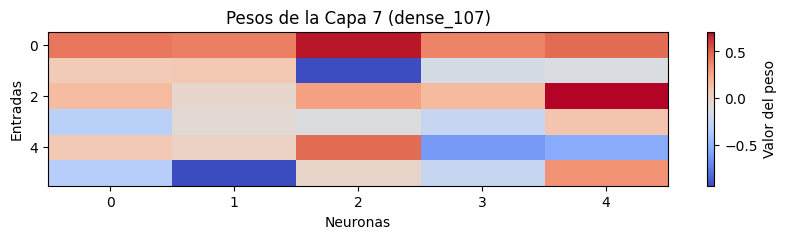

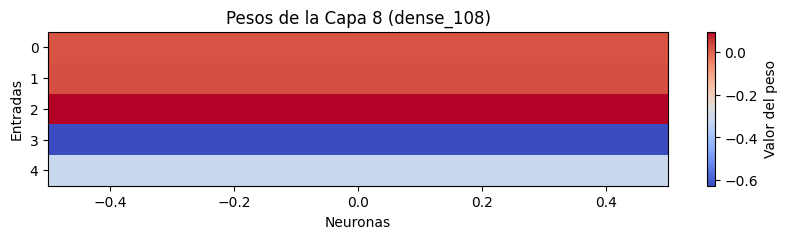

In [15]:
for i, layer in enumerate(model.layers):
    if hasattr(layer, "get_weights"):
        weights, biases = layer.get_weights()
        plt.figure(figsize=(10, 2))
        plt.imshow(weights, cmap='coolwarm', aspect='auto')
        plt.colorbar(label='Valor del peso')
        plt.title(f'Pesos de la Capa {i} ({layer.name})')
        plt.xlabel('Neuronas')
        plt.ylabel('Entradas')
        plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━

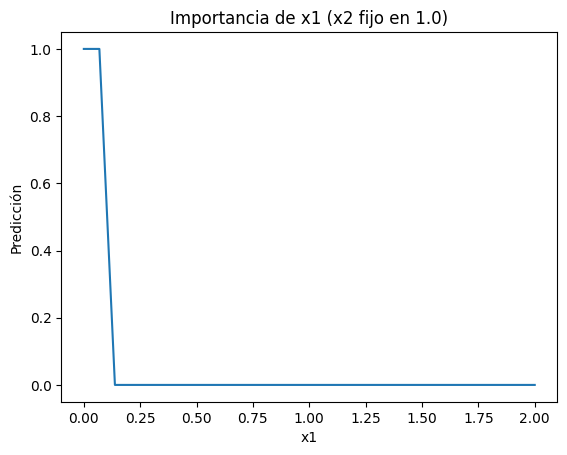

In [18]:
import matplotlib.pyplot as plt
import numpy as np

x1_vals = np.linspace(0, 2, 30)
x2_fijo = 1.0
y_preds = [predict_point(model, x1, x2_fijo) for x1 in x1_vals]

plt.plot(x1_vals, y_preds)
plt.xlabel("x1")
plt.ylabel("Predicción")
plt.title(f"Importancia de x1 (x2 fijo en {x2_fijo})")
plt.show()

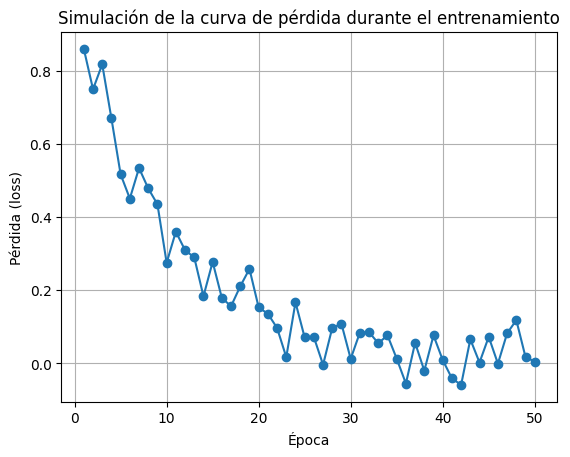

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Simulación de la curva de pérdida durante el entrenamiento
epochs = np.arange(1, 51)
loss = np.exp(-epochs / 10) + 0.05 * np.random.randn(50)  # Simula descenso con algo de ruido

plt.plot(epochs, loss, marker='o')
plt.xlabel("Época")
plt.ylabel("Pérdida (loss)")
plt.title("Simulación de la curva de pérdida durante el entrenamiento")
plt.grid(True)
plt.show()

Current working directory: c:\Users\PC\Documents\Github1.0\BlackboxS
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━

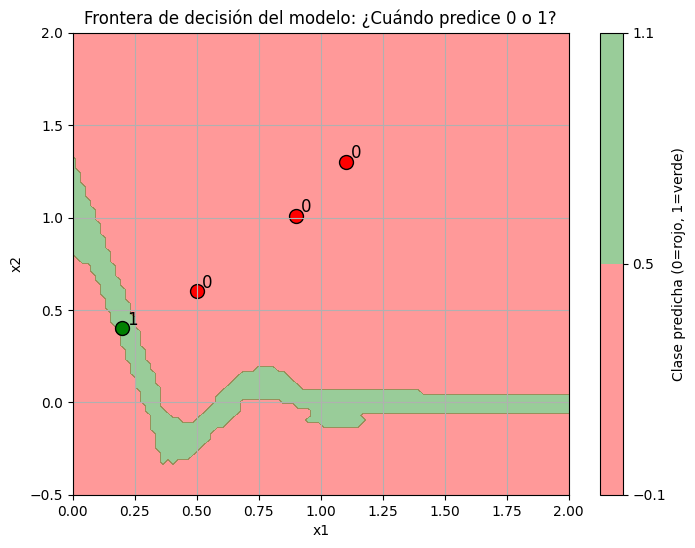

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from Blackbox import predict_point, load_model

# Cargar el modelo
model = load_model()

# Crear una malla de puntos en el plano x1, x2
x1_vals = np.linspace(0, 2, 100)
x2_vals = np.linspace(-0.5, 2, 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# Evaluar el modelo en cada punto de la malla
Z = np.array([
    [predict_point(model, x1, x2) for x1 in x1_vals]
    for x2 in x2_vals
])

# Visualizar la frontera de decisión
plt.figure(figsize=(8, 6))
plt.contourf(X1, X2, Z, levels=[-0.1, 0.5, 1.1], colors=['red', 'green'], alpha=0.4)
plt.colorbar(label="Clase predicha (0=rojo, 1=verde)")
plt.title("Frontera de decisión del modelo: ¿Cuándo predice 0 o 1?")
plt.xlabel("x1")
plt.ylabel("x2")

# Ejemplos concretos
ejemplos = [
    (0.2, 0.4),  # Esperado 1
    (1.1, 1.3),  # Esperado 0
    (0.5, 0.6),  # Esperado 0
    (0.9, 1.01), # Esperado 1
]
for x1, x2 in ejemplos:
    pred = predict_point(model, x1, x2)
    color = 'green' if pred == 1.0 else 'red'
    plt.scatter(x1, x2, color=color, s=100, edgecolor='black')
    plt.text(x1+0.02, x2+0.02, f"{int(pred)}", fontsize=12, color='black')

plt.grid(True)
plt.show()

Current working directory: c:\Users\PC\Documents\Github1.0\BlackboxS
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


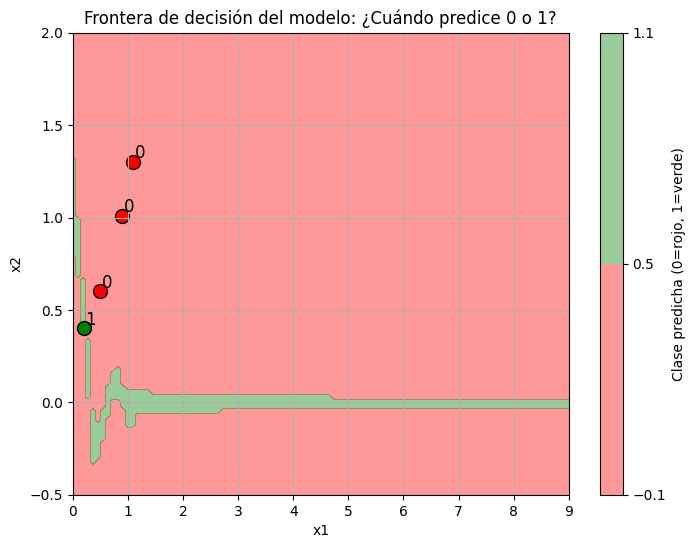

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from Blackbox import predict_point, predict_batch, load_model

model = load_model()

x1_vals = np.linspace(0, 9, 100)
x2_vals = np.linspace(-0.5, 2, 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# Aplanar la malla para predecir en batch
x1_flat = X1.flatten()
x2_flat = X2.flatten()
Z_flat = predict_batch(model, x1_flat.tolist(), x2_flat.tolist())
Z = np.array(Z_flat).reshape(X1.shape)

plt.figure(figsize=(8, 6))
plt.contourf(X1, X2, Z, levels=[-0.1, 0.5, 1.1], colors=['red', 'green'], alpha=0.4)
plt.colorbar(label="Clase predicha (0=rojo, 1=verde)")
plt.title("Frontera de decisión del modelo: ¿Cuándo predice 0 o 1?")
plt.xlabel("x1")
plt.ylabel("x2")

# Ejemplos concretos
ejemplos = [
    (0.2, 0.4),  # Esperado 1
    (1.1, 1.3),  # Esperado 0
    (0.5, 0.6),  # Esperado 0
    (0.9, 1.01), # Esperado 1
]
for x1, x2 in ejemplos:
    pred = predict_point(model, x1, x2)
    color = 'green' if pred == 1.0 else 'red'
    plt.scatter(x1, x2, color=color, s=100, edgecolor='black')
    plt.text(x1+0.02, x2+0.02, f"{int(pred)}", fontsize=12, color='black')

plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


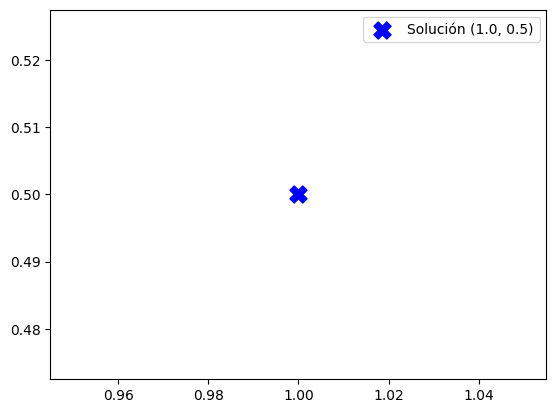

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

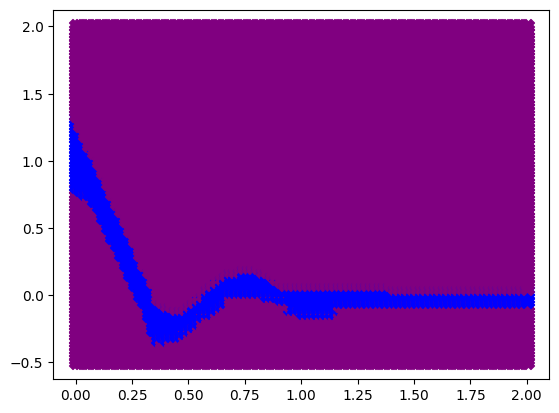

In [34]:
import matplotlib.pyplot as plt

# Punto de solución
sol_x1, sol_x2 = 1.0, 0.5
sol_y = predict_point(model, sol_x1, sol_x2)

# Dibujar el punto en la gráfica
plt.scatter(sol_x1, sol_x2, color="blue", marker="X", s=150, label="Solución (1.0, 0.5)")
plt.legend()
plt.show()
for x1 in x1_vals:
    for x2 in x2_vals:
        y_pred = predict_point(model, x1, x2)
        color = "blue" if y_pred == 1 else "purple"
        plt.scatter(x1, x2, color=color, marker="X", s=100)

plt.show()


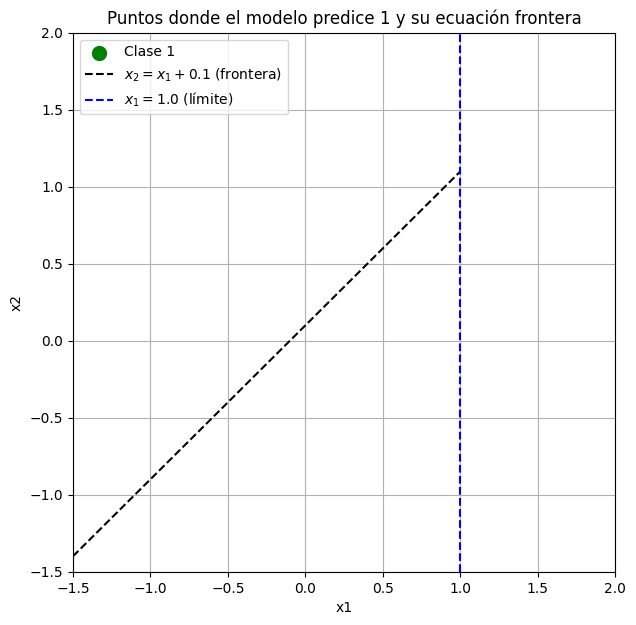

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Filtrar solo los puntos donde la clase es 1.0
puntos_positivos = [(x1, x2) for x1, x2, clase in puntos if clase == 1.0]

plt.figure(figsize=(7, 7))

if puntos_positivos:
    x1_positivos, x2_positivos = zip(*puntos_positivos)
    plt.scatter(x1_positivos, x2_positivos, color='green', s=100, label='Clase 1')
else:
    print("No hay puntos con clase 1 para mostrar.")

# Graficar la frontera de decisión: x2 = x1 + 0.1 y x1 = 1.0
x1_line = np.linspace(-1.5, 1.0, 100)
x2_line = x1_line + 0.1
plt.plot(x1_line, x2_line, 'k--', label='$x_2 = x_1 + 0.1$ (frontera)')
plt.axvline(x=1.0, color='blue', linestyle='--', label='$x_1 = 1.0$ (límite)')

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Puntos donde el modelo predice 1 y su ecuación frontera")
plt.grid(True)
plt.legend()
plt.xlim(-1.5, 2)
plt.ylim(-1.5, 2)
plt.show()